##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Clasificación básica: clasifique imágenes de prendas de vestir

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">Ver en TensorFlow.org</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/es-419/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Ejecutar en Google Colab</a></td>
  <td>     <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/es-419/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">Ver fuente en GitHub</a> </td>
  <td>     <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/es-419/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">Descargar notebook</a> </td>
</table>

Esta guía sirve para entrenar un modelo de redes neuronales para que clasifique imágenes de prendas de vestir, como calzado y camisas. No es necesario que entienda todos los detalles; este es un resumen rápido de un programa completo de TensorFlow donde se explican todos los detalles sobre la marcha.

Esta guía usa [tf.keras](https://www.tensorflow.org/guide/keras), una API de alto nivel que se usa para desarrollar y entrenar modelos en TensorFlow.

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


## Importar el conjunto de datos Fashion MNIST

Esta guía usa el conjunto de datos [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) que contiene 70 000 imágenes en escala de grises en 10 categorías. Las imágenes muestran artículos individuales de prendas de vestir en baja resolución (28 x 28 píxeles), como se puede ver a continuación:

<table>
  <tr><td>     <img src="https://tensorflow.org/images/fashion-mnist-sprite.png" alt="Fashion MNIST sprite" width="600">   </td></tr>
  <tr><td align="center">     <b>Figura 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Muestras de Fashion-MNIST</a> (de Zalando, licencia MIT).<br> </td></tr>
</table>

Fashion MNIST fue pensado como reemplazo directo del clásico conjunto de datos [MNIST](http://yann.lecun.com/exdb/mnist/), a menudo usado como el "Hola, mundo" de los programas de aprendizaje automático para visión artificial. El conjunto de datos MNIST contiene imágenes de dígitos escritos a mano (0, 1, 2, etc.) en un formato idéntico al de las prendas de vestir que usará aquí.

Esta guía usa Fashion MNIST para variar y porque constituye un desafío ligeramente más difícil que el MNIST común. Ambos conjuntos de datos son relativamente pequeños y se usan para comprobar que un algoritmo funcione según lo previsto. Suponen un buen punto de partida para la prueba y depuración de los códigos.

Aquí, se utilizan 60 000 imágenes para entrenar la red y 10 000 imágenes para evaluar la precisión con la que la red aprendió a clasificar imágenes. Puede acceder a Fashion MNIST directamente desde TensorFlow. Importe y [cargue los datos de Fashion MNIST](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directamente desde TensorFlow:

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Cargar el conjunto de datos devuelve cuatro arreglos NumPy:

- Los arreglos `train_images` y `train_labels` constituyen el *conjunto de entrenamiento*, los datos que el modelo usa para aprender.
- El modelo se compara con el *conjunto de prueba*, los arreglos `test_images`, y `test_labels`.

Las imágenes son arreglos NumPy de 28x28, con valores de píxeles que van de 0 a 255. Las *letiquetas* son un arreglo de números enteros, que van de 0 a 9. Estos corresponden a la *clase* de prenda de vestir que representa la imagen:

<table>
  <tr>
    <th>Etiqueta</th>
    <th>Clase</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen se asigna a una etiqueta única. Dado que los *nombres de las clases* no se incluyen en los conjuntos de datos, almacénelos aquí para usarlos más tarde, al trazar las imágenes:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explorar los datos

Antes de entrenar el modelo, exploremos el formato del conjunto de datos. A continuación, se muestra que el conjunto de entrenamiento contiene 60 000 imágenes, cada una de las cuales se representa por 28 x 28 píxeles:

In [6]:
train_images.shape

(60000, 28, 28)

Asimismo, el conjunto de entrenamiento consta de 60 000 etiquetas:

In [7]:
len(train_labels)

60000

Cada etiqueta es un número entero entre 0 y 9:

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

El conjunto de prueba está compuesto por 10 000 imágenes. Del mismo modo, cada imagen está representada por 28 x 28 píxeles:

In [9]:
test_images.shape

(10000, 28, 28)

Y el conjunto de prueba contiene 10 000 etiquetas de imágenes:

In [10]:
len(test_labels)

10000

## Preprocesar los datos

Los datos se deben preprocesar antes de entrenar la red. Si inspecciona la primera imagen en el conjunto de entrenamiento, verá que los valores de los píxeles se encuentran entre 0 y 255:

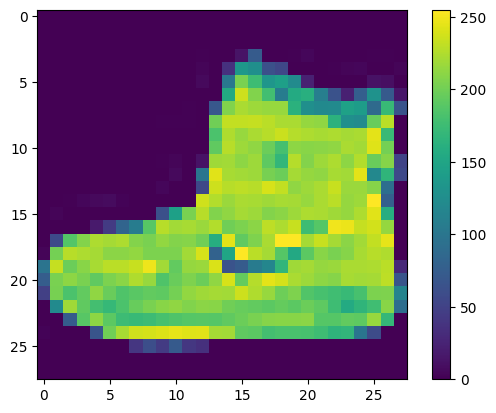

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Escale estos valores a un rango de 0 a 1 antes de cargarlos al modelo de red neuronal. Para ello, divida los valores por 255. Es importante que el *conjunto de entrenamiento* y el *conjunto de prueba* se preprocesen del mismo modo:

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que los datos tengan el formato correcto y que usted esté listo para generar y entrenar la red, mostraremos las primeras 25 imágenes del *conjunto de entrenamiento* con el nombre de la clase debajo de cada imagen.

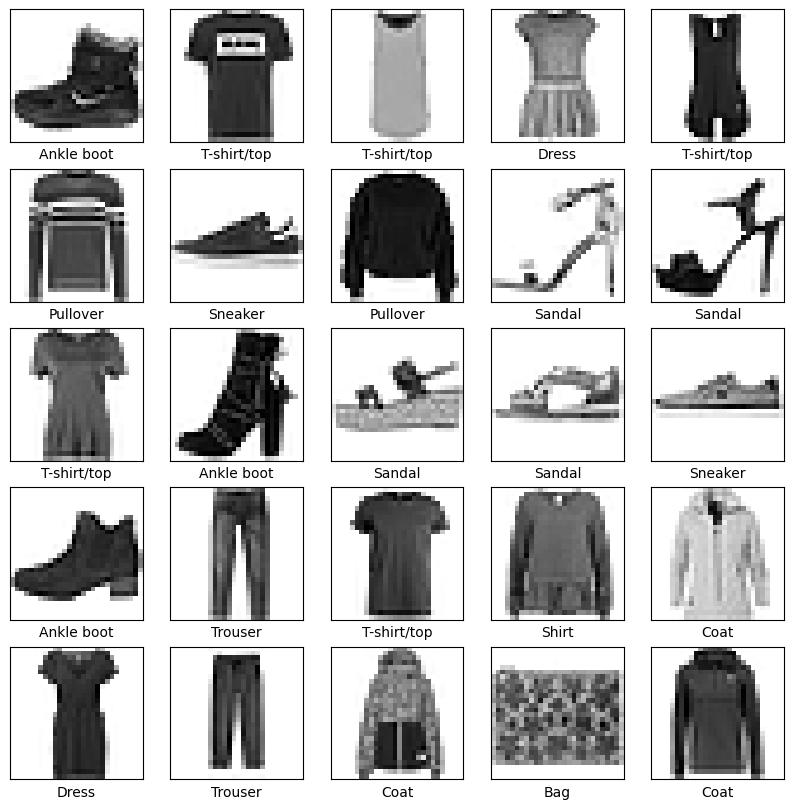

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Generar el modelo

Para generar la red neuronal es necesario configurar las capas del modelo y, a continuación, compilar el modelo.

### Configurar las capas

La [*capa*](https://www.tensorflow.org/api_docs/python/tf/keras/layers) es el componente básico de una red neuronal. Las capas extraen las representaciones de los datos que les cargan. Se espera que dichas representaciones sean significativas para el problema en cuestión.

La mayor parte del aprendizaje profundo consiste en encadenar capas simples. La mayoría de las capas, como `tf.keras.layers.Dense`, tienen parámetros que se aprenden durante el entrenamiento.

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


La primera capa de esta red, `tf.keras.layers.Flatten`, transforma el formato de las imágenes de un arreglo de dos dimensiones (de 28 x 28 píxeles) a un arreglo de una dimensión (de 28 * 28 = 784 píxeles). Piense en esta capa como una forma de desapilar las filas de píxeles de la imagen y alinearlas. Esta capa no tiene parámetros que aprender; sólo vuelve a dar formato a los datos.

Luego de aplanar los píxeles, la red consiste de una secuencia de dos capas `tf.keras.layers.Dense`. Estas son capas neuronales densamente conectadas (o completamente conectadas). La primera capa `Dense` cuenta de 128 nodos (o neuronas). La segunda (y última capa) devuelve un arreglo logits con una longitud de 10. Cada nodo contiene un puntaje que indica que la imagen actual pertenece a una de las 10 clases.

### Compilar el modelo

Antes de que el modelo esté listo para entrenamiento, necesita algunos ajustes más. Estos ajustes se agregan durante el paso de [*compilación*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) del modelo:

- [*Función de pérdida*](https://www.tensorflow.org/api_docs/python/tf/keras/losses): mide el nivel de precisión del modelo durante el entrenamiento. Se busca minimizar esta función para "dirigir" el modelo en la dirección correcta.
- [*Optimizador*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers): se refiere al modo en que se actualiza el modelo en función de los datos que ve y su función de pérdida.
- [*Métricas*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics): se usan para monitorear los pasos de entrenamiento y prueba. El siguiente ejemplo usa *precisión*, la fracción de imágenes que se clasificaron correctamente.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Entrenar el modelo

Para entrenar el modelo de redes neuronales, se requieren los siguientes pasos:

1. Cargue los datos de entrenamiento al modelo. En este ejemplo, los datos de entrenamiento están en los arreglos `train_images` y `train_labels`.
2. El modelo aprende a asociar imágenes con etiquetas.
3. Usted le pide al modelo que haga predicciones sobre un conjunto de prueba, en este ejemplo, el arreglo `test_images`.
4. Verifique que las predicciones coincidan con las etiquetas del arreglo `test_labels`.


### Cargar el modelo

Para comenzar el entrenamiento, llame el método [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit), llamado así porque "ajusta" el modelo a los datos de entrenamiento:

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7813 - loss: 0.6272
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8625 - loss: 0.3841
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8751 - loss: 0.3429
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8830 - loss: 0.3157
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8929 - loss: 0.2973
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8976 - loss: 0.2765
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9014 - loss: 0.2697
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9032 - loss: 0.2597
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9079 - loss: 0.2473
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9134 - loss: 0.2320


A medida que se entrena el modelo, se muestran las métricas de pérdida y precisión. Este modelo alcanza una precisión de 0,91 (o 91 %) en los datos de entrenamiento.

### Evaluar la precisión

A continuación, compare el rendimiento del modelo en el conjunto de prueba:

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8829 - loss: 0.3302

Test accuracy: 0.8828999996185303


Se observa que la precisión del conjunto de prueba es un poco menor que la precisión del conjunto de entrenamiento. Esta brecha entre la precisión de entrenamiento y de prueba representa un *sobreajuste*. El sobreajuste se produce cuando un modelo de aprendizaje automático rinde menos con entradas nuevas o desconocidas que con los datos de entrenamiento. Un modelo sobreajustado "memoriza" el ruido y los detalles del conjunto de datos de entrenamiento en una medida que afecta negativamente el rendimiento del modelo con los nuevos datos. Si desea obtener más información, consulte los siguientes recursos:

- [Demostrar sobreajuste](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
- [Estrategias para evitar el sobreajuste](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Hacer predicciones

Una vez que cuenta con el modelo entrenado, puede usarlo para hacer predicciones sobre algunas imágenes. Adjunte una capa softmax para convertir las salidas lineales del modelo ([logits](https://developers.google.com/machine-learning/glossary#logits)) en probabilidades, que deberían ser más fáciles de interpretar.

In [18]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Aquí, el modelo predijo la etiqueta para cada imagen del conjunto de prueba. Veamos la primera predicción:

In [20]:
predictions[0]

array([2.4729232e-07, 3.1957820e-12, 4.5976338e-09, 6.6562159e-11,
       5.7113039e-09, 3.8197935e-03, 2.4185086e-08, 1.7387331e-02,
       1.8934493e-08, 9.7879267e-01], dtype=float32)

Una predicción es un arreglo de 10 números que representan la "confianza" del modelo en que la imagen corresponde a una de las 10 distintas prendas de vestir. Puede ver qué etiqueta tiene el valor de confianza más alto:

In [21]:
np.argmax(predictions[0])

np.int64(9)

Entonces, el modelo tiene más confianza en que esta imagen corresponde a una botineta, o `class_names[9]`. Al examinar la etiqueta de prueba vemos que esta clasificación es correcta:

In [22]:
test_labels[0]

np.uint8(9)

Grafique esto para ver el conjunto completo de predicciones de 10 clases.

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verificar las predicciones

Cuando haya entrenado el modelo, podrá usarlo para hacer predicciones de algunas imágenes.

Veamos la imagen 0, las predicciones y el arreglo de predicción. Las predicciones correctas se muestran en azul y las etiquetas de las predicciones incorrectas en rojo. El número indica el porcentaje (de 100) de la etiqueta predicha.

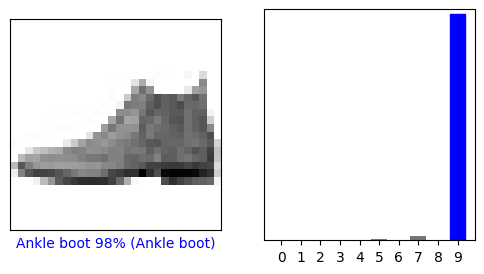

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

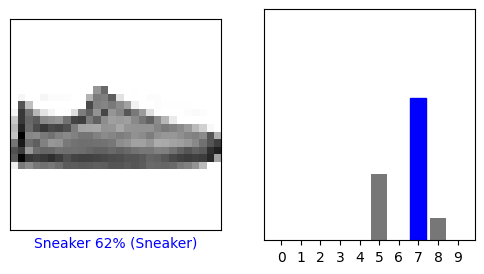

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Tracemos varias imágenes con sus predicciones. Tenga en cuenta que el modelo puede equivocarse incluso cuando el nivel de confianza sea alto.

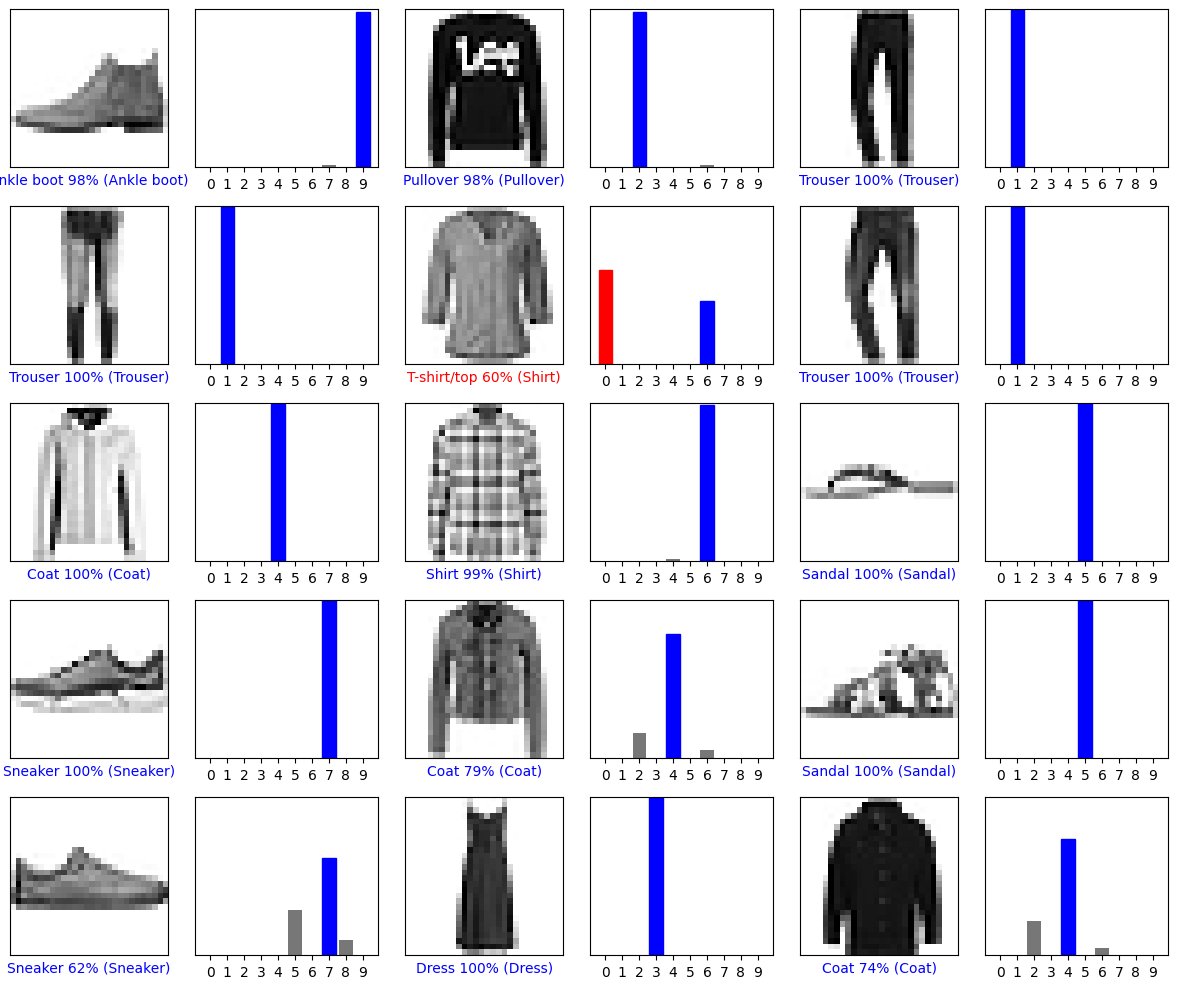

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Usar el modelo entrenado

Por último, use el modelo entrenado para hacer predicciones de una sola imagen.

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


Los modelos `tf.keras` se optimizaron para hacer predicciones sobre un *lote*, o colección, de ejemplos al mismo tiempo. Por lo tanto, aunque utilice una sola imagen, debe añadirla a una lista:

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Ahora, prediga la etiqueta correcta para esta imagen:

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[9.9985523e-04 2.4456658e-14 9.8354232e-01 1.3908724e-10 3.0095573e-03
  4.4369357e-09 1.2448231e-02 3.6901979e-12 6.1042664e-11 6.1605418e-14]]


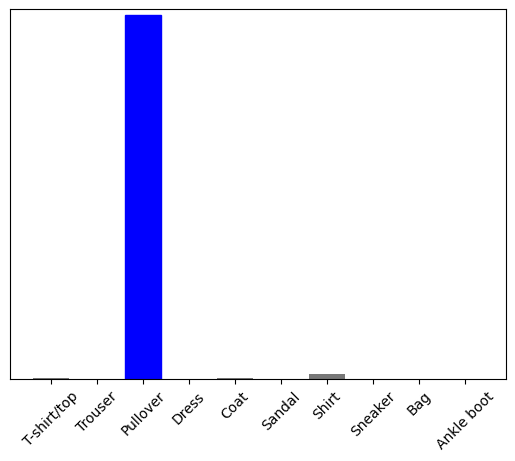

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` devuelve una lista de listas (una lista para cada imagen del lote de datos). Tome las predicciones de nuestra (única) imagen en el lote:

In [31]:
np.argmax(predictions_single[0])

np.int64(2)

Y el modelo predice una etiqueta, como era de esperarse.